In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
X_train = pd.read_csv("./Dataset/dataset/train_images.csv")
X_test = pd.read_csv("./Dataset/dataset/test_images.csv")
y_train = pd.read_csv("./Dataset/dataset/train_labels.csv")
y_test = pd.read_csv("./Dataset/dataset/test_labels.csv")

In [3]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((60000, 785), (60000, 2), (15000, 785), (15000, 2))


In [4]:
y_train = y_train.drop(columns=['Unnamed: 0'], axis=1)
y_test = y_test.drop(columns=['Unnamed: 0'], axis=1)
X_train = X_train.drop(columns=['Unnamed: 0'], axis=1)
X_test = X_test.drop(columns=['Unnamed: 0'], axis=1)

In [5]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((60000, 784), (60000, 1), (15000, 784), (15000, 1))


In [6]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

temp = X_test.to_numpy()
X_test = temp
temp = X_train.to_numpy()
X_train = temp

print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))
print(type(X_train), type(X_test), type(y_train), type(y_test))

((60000, 784), (60000, 1), (15000, 784), (15000, 1))
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [20]:
y_test = y_test.reshape(len(y_test))
y_train = y_train.reshape(len(y_train))

print(y_test.shape, y_train.shape)

(15000,) (60000,)


In [7]:
randPic = X_train[np.random.choice(X_train.shape[0])]
print(randPic.shape)

(784,)


In [8]:
randPic = randPic.reshape((28,28))
print(randPic.shape)

(28, 28)


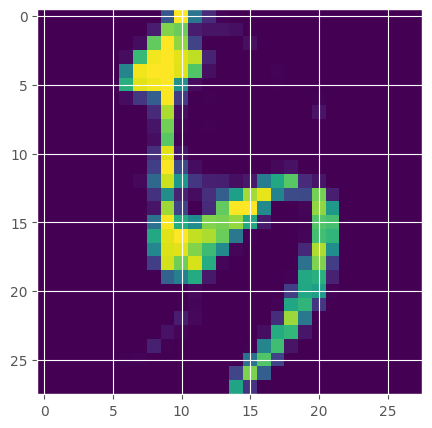

In [9]:
plt.imshow(randPic)

In [10]:
picCatalogue = []
for i in range(20):
    picCatalogue.append(X_train[np.where(y_train == i)[0][0]])

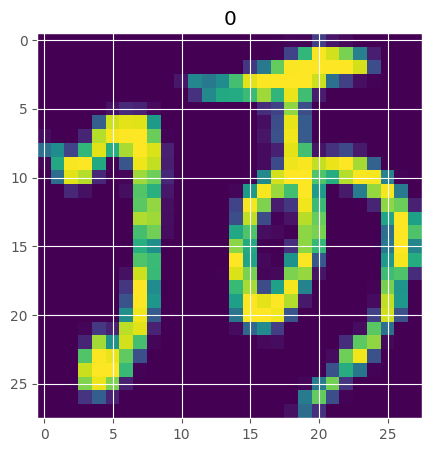

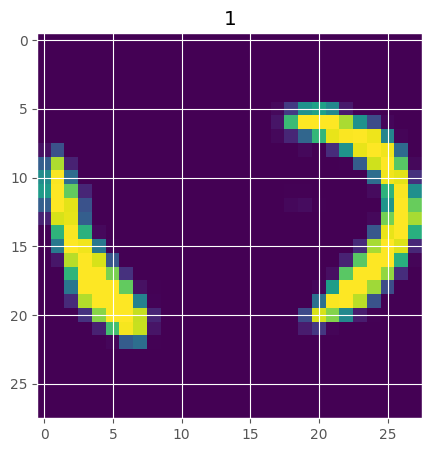

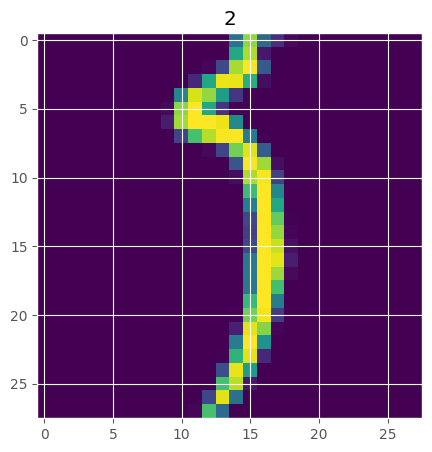

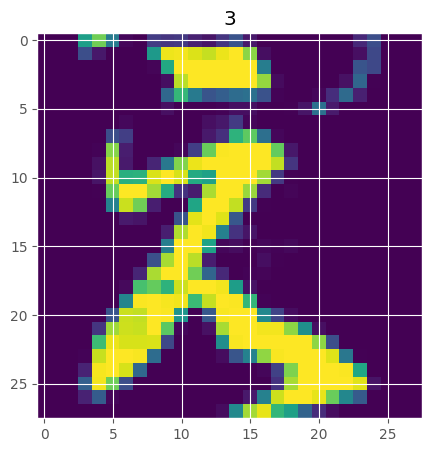

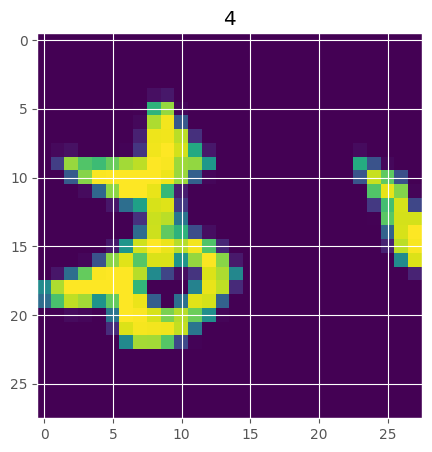

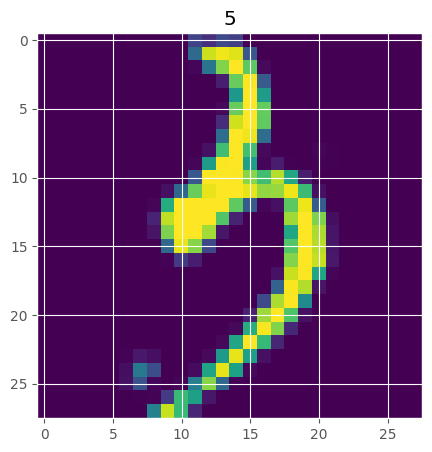

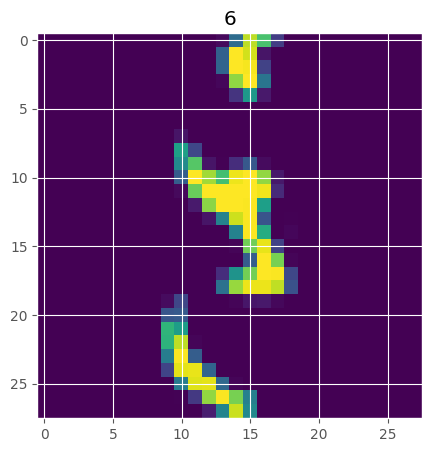

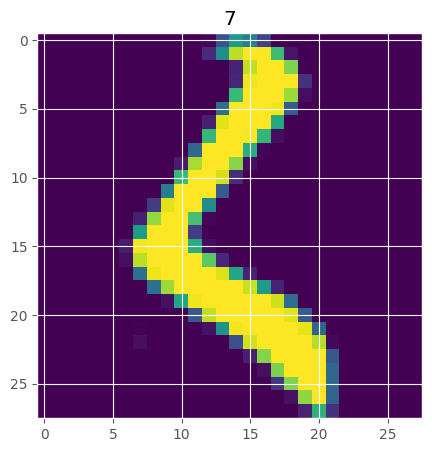

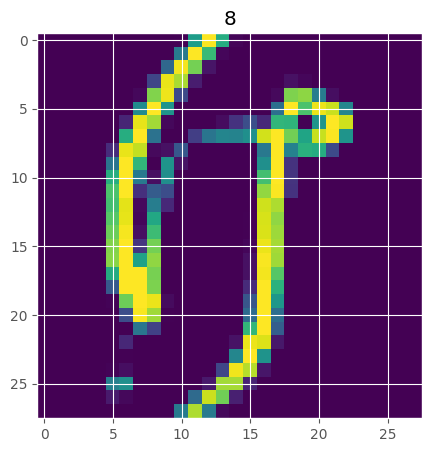

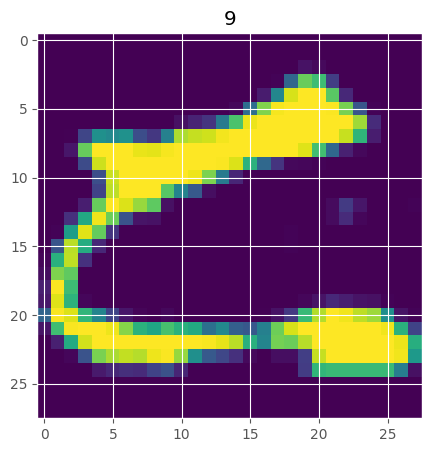

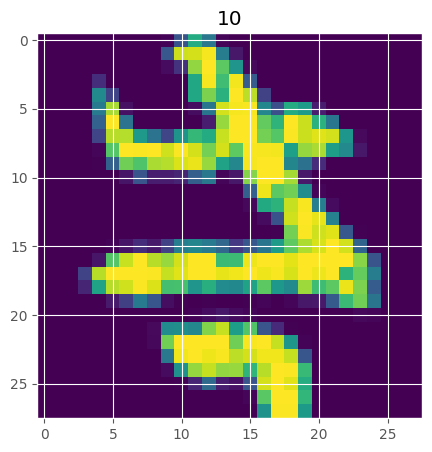

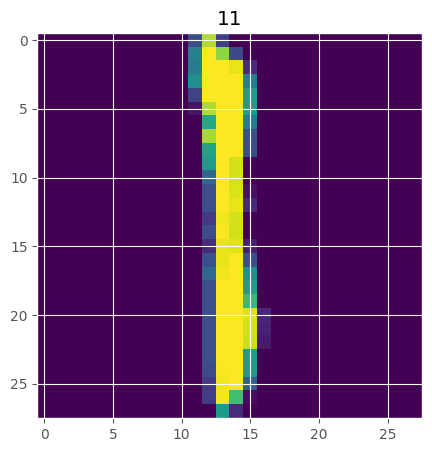

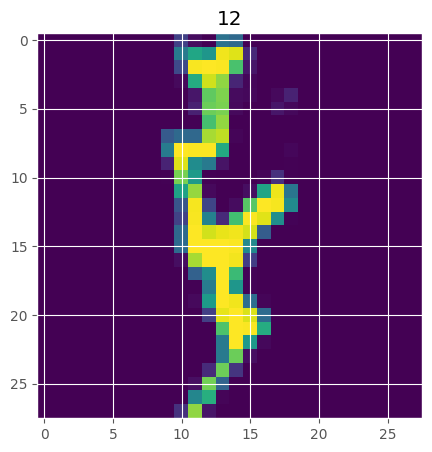

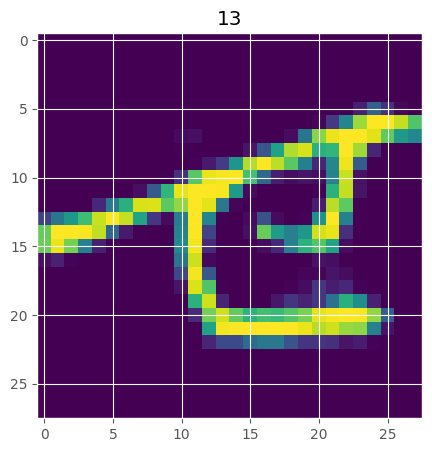

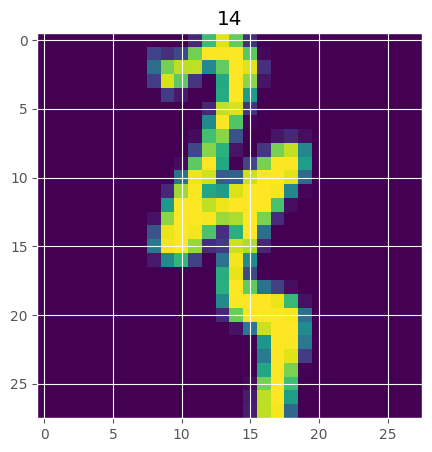

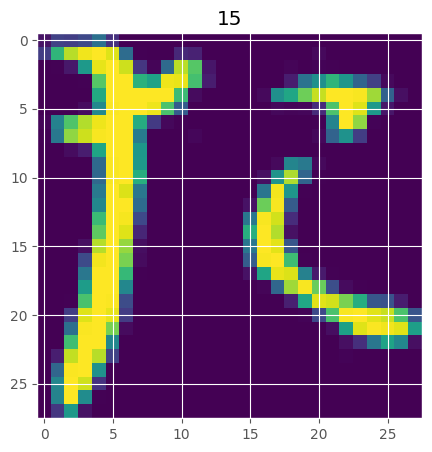

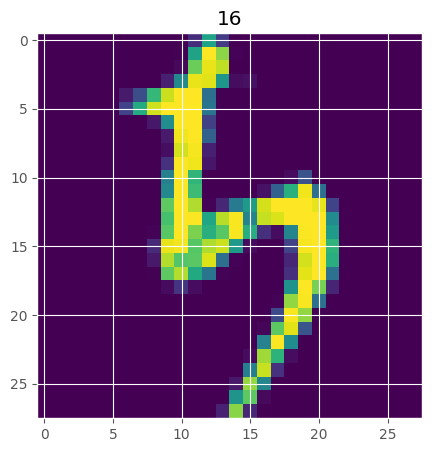

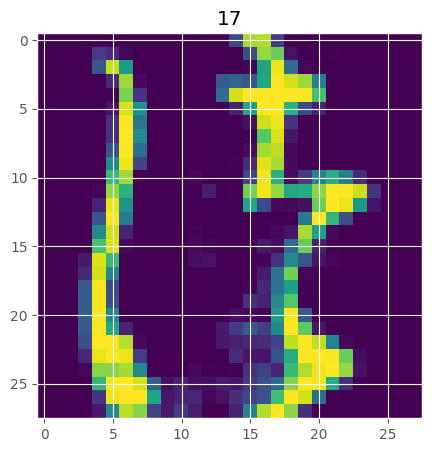

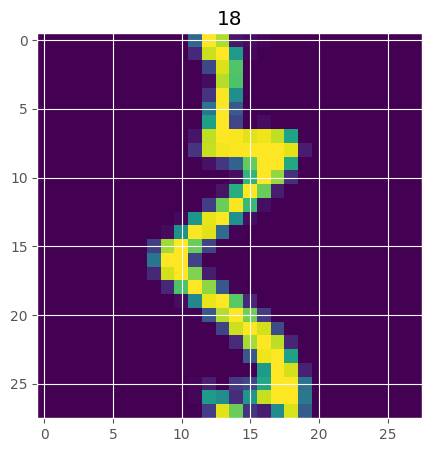

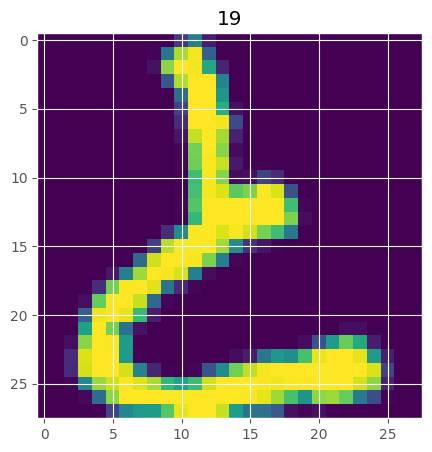

In [11]:
for i in range(len(picCatalogue)):
    plt.figure()
    plt.title(i)
    plt.imshow(picCatalogue[i].reshape((28,28)))

In [23]:
def countClasses(y):
    classCount = []
    for i in range(20):
        classCount.append(0)
    for i in y:
        classCount[i] += 1
    return range(20), classCount

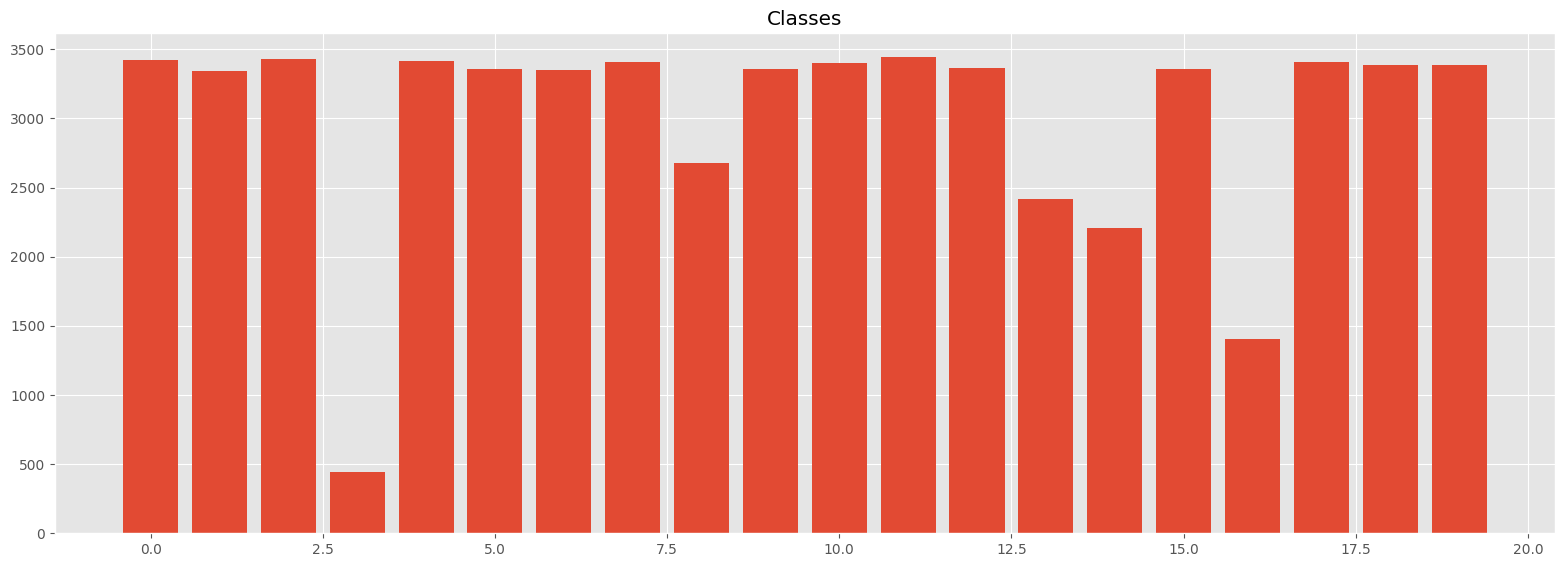

In [26]:
classes, count = countClasses(y_train)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classes, count)
plt.title("Classes")
plt.show()

As we can see in the plot we have very small number of training data for some of the classes like 3 and 16.

In [29]:
X_train = X_train / 255
X_test = X_test / 255

If we don't scale down the input some of them will be much greater than other ones even though the difference does not yield any significant information. pictures that are very bright might confuse the model